In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [35]:
data = pd.read_csv('bikedata.csv') 

In [18]:
data.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [32]:
data['Feature2'] = data['weathersit'].astype('category')

In [38]:
data.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [39]:
# Select relevant features and the target variable
X = data[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
y = data['cnt']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# make predictions on the test set
y_pred=model.predict(X_test)

In [52]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error: 570.7139049879678
Mean Squared Error: 562913.0197910956
Root Mean Squared Error: 750.2752960021379
R-squared (R2): 0.8355422116950036


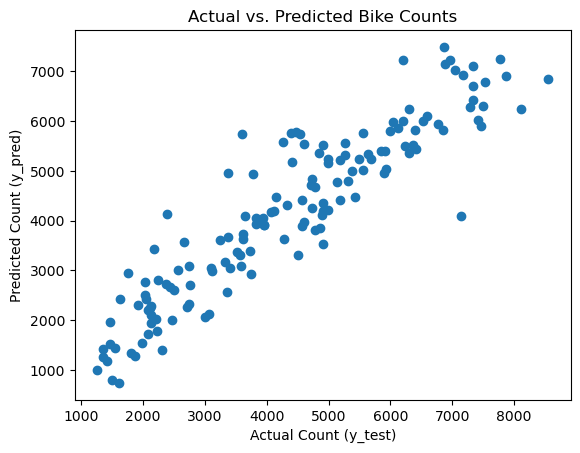

In [54]:
# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Count (y_test)')
plt.ylabel('Predicted Count (y_pred)')
plt.title('Actual vs. Predicted Bike Counts')
plt.show()